# 실습목표
- 인공지능 모델을 만들기 전에 과제를 어떻게 정의하는지 알 수 있다.
- 타인의 정의된 과제를 살펴보고 필요한 추가 정보가 무엇인지 생각하는 과정을 이해한다.
- 회귀 예측 문제를 해결하는 인공지능 모델을 만들 수 있다.

# 과제 정의

- (주)마이자산관리는 여러가지 대 고객 서비스 중에 부동산 서비스를 개선하고자 합니다.
- 이를 통해 더 많은 고객방문을 유도하고 부동산 자금을 위탁하게 함으로 운용자본을 증가시킬 수 있다고 판단합니다.
- 아울러 이러한 운영자본을 바탕으로 수익율을 개선하는 기대효과가 있다고 예상합니다.
- 부동산 서비스 개선의 목표는 통계기법의 주택 가격 예측을 인공지능 기반으로 예측하려합니다.
- 인공지능 기반의 예측은 초기 홍보 효과와 지속적인 높은 정확성으로 기대효과에 부응할 것입니다.

# 데이터 세트

- 데이터 세트명 : The Ames Housing dataset
- 데이터 세트 출처 : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# 데이터 세트 상세 설명

- 데이터는 1460건이며, 총 81개의 컬럼으로 구성됨
- SalePrice 컬럼이 예측을 해야하는 주택가격입니다.

- MSSubClass : 건물 클래스
- MSZoning : 일반적인 구역 분류
- LotFrontage : 부동산과 연결된 거리의 선형 피트
- LotArea : 부지 크기(평방피트)
- Street : 도로 접근 유형
- Alley : 골목 접근 방식
- LotShape : 부동산의 일반적인 형태
- LandContour : 대지의 평탄도
- Utilities : 사용 가능한 유틸리티 종류
- LotConfig : 로트 구성
- LandSlope : 토지의 경사
- Neighborhood : Ames 시 경계 내의 물리적 위치
- Condition1 : 주요 도로 또는 철도에 근접함
- Condition1 : 주요 도로 또는 철도에 근접함(두 번째가 있는 경우)
- BldgType : 주거 유형
- HouseStyle : 주거 스타일
- OverallQual : 전체적인 재질 및 마감 품질  
...   
...  
...  
...  

# 모델의 성능 지표 (Metric) : 평균제곱근오차 (RMSE, Root Mean Squared Error)
 - 오차를 제곱함으로 양수와 음수가 될 수 있는 오차를 상쇄하지 않도록 하는 정밀도 계산 방법
 - 오차가 매우 큰 경우(이상치) 지표에 많이 반영되어 민감도가 높아져 모델 학습을 불안하게 만드는 경향이 있다.
 - 이를 개선하기 위하여 제곱근을 취함으로 모델의 학습 안정에 기여한다.

In [115]:
####### 프로그램 코드에서 필요하지 않은 패키지를 삭제하고 프로그램을 실행해 보세요.

# 필수 패키지 로드
import gdown
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

In [116]:
# 파일 다운로드
google_path = 'https://drive.google.com/uc?id='
file_id = '1oL3KU8zMxI8AfANJSeI-jHCQHZeiJ9mW'
output_name = 'train.csv'
gdown.download(google_path+file_id, output_name)

Downloading...
From: https://drive.google.com/uc?id=1oL3KU8zMxI8AfANJSeI-jHCQHZeiJ9mW
To: /content/train.csv
100%|██████████| 461k/461k [00:00<00:00, 74.0MB/s]


'train.csv'

# 컬럼 제한 : 학습대상 10개 컬럼

In [191]:
####### 학습대상을 임의의 6개 컬럼으로 제한하고 학습하는 프로그램 코드를 완성해 보세요. 또한 임의의 6개를 다양하게 변경해서 학습결과를 비교해 보세요.

# 파일을 불러오고 10개의 컬럼만 실습대상으로 제한
train = pd.read_csv('train.csv')

print('제한 전 train 데이터 크기 : ', train.shape)

#train = train.iloc[:, [0,1,2,3,4,5,6,7,8,9,-1]]  # 10개 컬럼으로 제한
print('제한 후 train 데이터 크기 : ', train.shape)

train

제한 전 train 데이터 크기 :  (1460, 81)
제한 후 train 데이터 크기 :  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 데이터 구조 파악

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [193]:
# 결측치 확인
print(train.isnull().sum())
train.isnull().sum()[train.isnull().sum() > 0]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


-  결측치를 어떻게 할 것인지 결정
  - Task, Business, Domain 지식에 따라 결정
  - 이러한 지식이 없다면 반복 실험으로 결정

In [194]:
####### 결측치를 0으로 치환하고 학습, 아무런 작업을 하지 않고 학습하는 등 다양한 방법으로 결측치 처리를 한 후 그 결과를 비교해 보세요.

# 결측치가 1개 이상 있는 컬럼 제거
train_dropna = train.dropna(axis=1)
print('train 데이터 크기 : ', train_dropna.shape)
train_dropna

train 데이터 크기 :  (1460, 62)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# 탐색적 자료 분석 (EDA, Exploratory Data Analysis)

In [121]:
# 각 컬럼의 값 확인
train_dropna['Id'].value_counts()

,count
Id,
1,1
982,1
980,1
979,1
978,1
...,...
485,1
484,1
483,1


In [122]:
# 각 컬럼의 값 확인
train_dropna['MSSubClass'].value_counts()

,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


In [123]:
# 각 컬럼의 값 확인
train_dropna['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [124]:
# 각 컬럼의 값 확인
train_dropna['LotArea'].value_counts()

,count
LotArea,
7200,25
9600,24
6000,17
9000,14
8400,14
...,...
14601,1
13682,1
4058,1


In [125]:
# 각 컬럼의 값 확인
train_dropna['Street'].value_counts()

,count
Street,
Pave,1454
Grvl,6


In [126]:
# 각 컬럼의 값 확인
train_dropna['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


In [127]:
# 각 컬럼의 값 확인
train_dropna['LandContour'].value_counts()

,count
LandContour,
Lvl,1311
Bnk,63
HLS,50
Low,36


In [128]:
# 각 컬럼의 값 확인
train_dropna['Utilities'].value_counts()

,count
Utilities,
AllPub,1459
NoSeWa,1


<Axes: >

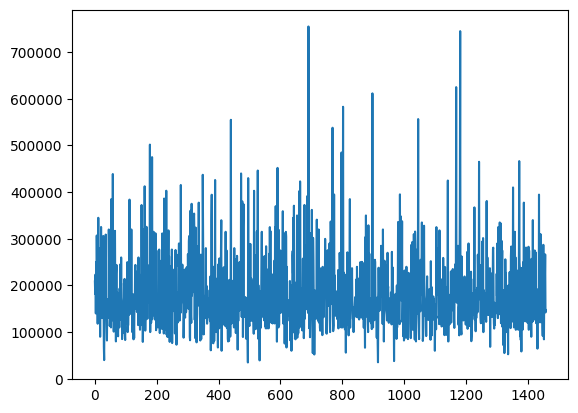

In [129]:
####### 시각화 결과에 대해 자신만의 생각을 주석으로 작성해 보세요.
#골고루 분포되어 있나보군.
# SalePrice 시각화
train_dropna['SalePrice'].plot()

# EDA 결과 반영

In [132]:
# MSZoning 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['MSZoning'])
train_dropna['MSZoning'] = le.transform(train_dropna['MSZoning'])

# Street 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['Street'])
train_dropna['Street'] = le.transform(train_dropna['Street'])

# LotShape 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['LotShape'])
train_dropna['LotShape'] = le.transform(train_dropna['LotShape'])

# LandContour 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['LandContour'])
train_dropna['LandContour'] = le.transform(train_dropna['LandContour'])

# LandContour 컬럼 수치형으로 변경
le = LabelEncoder()
le.fit(train_dropna['Utilities'])
train_dropna['Utilities'] = le.transform(train_dropna['Utilities'])


<ipython-input-132-ddcc571284a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna['MSZoning'] = le.transform(train_dropna['MSZoning'])
<ipython-input-132-ddcc571284a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna['Street'] = le.transform(train_dropna['Street'])
<ipython-input-132-ddcc571284a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [195]:
object_columns = train_dropna.select_dtypes(include='object').columns

# numpy array에 저장
object_columns_array = np.array(object_columns)
print(object_columns_array)

for i in range(len(object_columns_array)):
    le = LabelEncoder()
    le.fit(train_dropna[object_columns_array[i]])
    train_dropna[object_columns_array[i]] = le.transform(train_dropna[object_columns_array[i]])



['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'ExterQual' 'ExterCond' 'Foundation' 'Heating' 'HeatingQC' 'CentralAir'
 'KitchenQual' 'Functional' 'PavedDrive' 'SaleType' 'SaleCondition']


<ipython-input-195-d8aa4f98f35d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna[object_columns_array[i]] = le.transform(train_dropna[object_columns_array[i]])
<ipython-input-195-d8aa4f98f35d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna[object_columns_array[i]] = le.transform(train_dropna[object_columns_array[i]])
<ipython-input-195-d8aa4f98f35d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [196]:
# 데이터 구조 확인
train_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   LotShape       1460 non-null   int64
 6   LandContour    1460 non-null   int64
 7   Utilities      1460 non-null   int64
 8   LotConfig      1460 non-null   int64
 9   LandSlope      1460 non-null   int64
 10  Neighborhood   1460 non-null   int64
 11  Condition1     1460 non-null   int64
 12  Condition2     1460 non-null   int64
 13  BldgType       1460 non-null   int64
 14  HouseStyle     1460 non-null   int64
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  YearRemodAdd   1460 non-null   int64
 19  RoofSt

In [197]:
# 기초통계량 확인
train_dropna.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


# 학습 데이터, 검증 데이터 분리

In [198]:
####### 학습 데이터와 검증 데이터를 분리하는 건수는 정해져 있지 않습니다. 다양한 크기로 분리하여 학습과 검증해 보시기 바랍니다.

# 총 1460건의 데이터를 1400 : 60 으로 분리하여 1400건으로 학습하고, 60건으로 검증
train_data = train_dropna[:1400]
valid_data = train_dropna[1400:]

train_data.shape, valid_data.shape

((1400, 62), (60, 62))

In [203]:
####### 학습에 일부 컬럼만 사용할 필요가 있을 수 있습니다. 일부 컬럼명을 이용하여 데이터를 선택하여 학습한 후 다른 결과와 비교해 보세요.

# 학습용 데이터 준비
x_train = train_data.iloc[:, :61]
y_train = train_data.iloc[:, 61]

x_train.shape, y_train.shape
print(y_train)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1395    281213
1396    160000
1397    137500
1398    138000
1399    137450
Name: SalePrice, Length: 1400, dtype: int64


In [204]:
# 검증용 데이터 준비
x_valid = valid_data.iloc[:, :61]
y_valid = valid_data.iloc[:, 61]

x_valid.shape, y_valid.shape

((60, 61), (60,))

# 모델 학습

In [205]:
####### 학습 파라메터는 정해져 있지 않습니다. 다양한 크기로 변경하여 학습한 후 검증결과를 확인해 보세요.

# 학습
params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'num_leaves': 30,
    'objective': 'rmse',
    'random_state': 42,
}


model = lgb.LGBMRegressor(**params)
model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3159
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 57
[LightGBM] [Info] Start training from score 181085.180714


LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=30,
              objective='rmse', random_state=42)

# 모델 예측

In [206]:
# 예측
valid_data['pred'] = model.predict(x_valid)
valid_data

<ipython-input-206-b918ebfff17a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['pred'] = model.predict(x_valid)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred
1400,1401,50,4,6000,1,3,3,0,0,0,...,0,0,0,0,7,2008,8,4,120000,119128.663490
1401,1402,60,3,7415,1,0,3,0,4,0,...,0,0,0,0,4,2008,8,4,193000,178667.910260
1402,1403,20,3,6762,1,3,3,0,4,0,...,0,0,0,0,7,2006,6,5,193879,190918.259776
1403,1404,20,3,15256,1,0,3,0,1,0,...,0,0,0,0,8,2007,8,4,282922,274836.587561
1404,1405,50,3,10410,1,3,3,0,0,0,...,0,0,0,0,1,2006,8,3,105000,104052.258113
1405,1406,120,4,3842,1,0,1,0,4,1,...,0,155,0,0,1,2008,8,4,275000,284950.139471
1406,1407,85,3,8445,1,3,3,0,0,0,...,0,0,0,0,3,2009,8,4,133000,133120.352704
1407,1408,20,3,8780,1,0,3,0,0,0,...,0,0,0,0,3,2009,8,4,112000,119298.498348
1408,1409,70,4,7740,1,3,3,0,4,0,...,0,168,0,0,6,2010,8,4,125500,101749.083718
1409,1410,60,3,20544,1,0,3,0,1,0,...,0,0,0,0,11,2008,8,4,215000,213546.295183


# 모델 검증

In [207]:
# 검증 - 1
score = np.sqrt(np.sum((valid_data['SalePrice'] - valid_data['pred'])**2)/len(valid_data))

print('RMSE = ', score)

RMSE =  19764.304824810435


In [188]:
# 검증 - 2
score = mean_squared_error(valid_data['SalePrice'], valid_data['pred']) ** 0.5
# score = mean_squared_error(valid_data['SalePrice'], valid_data['pred'], squared=False)

print('RMSE = ', score)

RMSE =  19820.0014501301


In [190]:
RMSE =  58791.69911598906


# 사후 분석(설명력) : 변수 중요도

In [208]:
# 변수 중요도
val_imp = pd.DataFrame(model.feature_importances_, index=model.feature_name_, columns=['imp'])
val_imp

,imp
Id,440
MSSubClass,99
MSZoning,162
LotArea,1071
Street,0
...,...
MiscVal,0
MoSold,206
YrSold,143
SaleType,25


<Axes: >

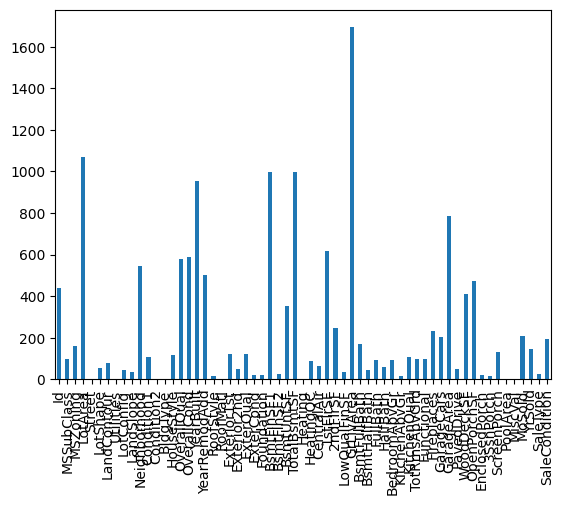

In [209]:
####### 변수 중요도 크기에 따라 정렬한 후 시각화는 프로그램 코드를 완성해 보세요.

# 변수 중요도 시각화
val_imp['imp'].plot(kind='bar')

낮은 importance  변수 버리고 다시 학습


In [210]:
dropit1 = []
dropit1 = val_imp[val_imp.imp<30]
dropit1 = dropit1.index
dropit1



Index(['Street', 'Utilities', 'Condition2', 'BldgType', 'RoofStyle',
       'RoofMatl', 'ExterCond', 'Foundation', 'BsmtFinSF2', 'Heating',
       'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal',
       'SaleType'],
      dtype='object')

In [212]:
for i in range(len(dropit1)):
  train_dropna.drop(columns=[dropit1[i]], inplace=True)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-212-5a97cf2f9a8a>, line 3)

In [213]:
train_dropna.drop(columns=['Id'], inplace=True)

<ipython-input-213-a8563465bc49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dropna.drop(columns=['Id'], inplace=True)


In [214]:
train_dropna

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleCondition,SalePrice
0,60,3,8450,3,3,4,0,5,2,5,...,2,548,2,0,61,0,2,2008,4,208500
1,20,3,9600,3,3,2,0,24,1,2,...,2,460,2,298,0,0,5,2007,4,181500
2,60,3,11250,0,3,4,0,5,2,5,...,2,608,2,0,42,0,9,2008,4,223500
3,70,3,9550,0,3,0,0,6,2,5,...,3,642,2,0,35,0,2,2006,0,140000
4,60,3,14260,0,3,2,0,15,2,5,...,3,836,2,192,84,0,12,2008,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,3,4,0,8,2,5,...,2,460,2,0,40,0,8,2007,4,175000
1456,20,3,13175,3,3,4,0,14,2,2,...,2,500,2,349,0,0,2,2010,4,210000
1457,70,3,9042,3,3,4,0,6,2,5,...,1,252,2,0,60,0,5,2010,4,266500
1458,20,3,9717,3,3,4,0,12,2,2,...,1,240,2,366,0,0,4,2010,4,142125


#다시 학습시키기

In [216]:
train_data = train_dropna[:1400]
valid_data = train_dropna[1400:]

train_data.shape, valid_data.shape
# 학습용 데이터 준비
x_train = train_data.iloc[:, :44]
y_train = train_data.iloc[:, 44]

x_train.shape, y_train.shape
print(y_train)
# 검증용 데이터 준비
x_valid = valid_data.iloc[:, :44]
y_valid = valid_data.iloc[:, 44]

x_valid.shape, y_valid.shape

# 학습
params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'num_leaves': 30,
    'objective': 'rmse',
    'random_state': 42,
}


model_re = lgb.LGBMRegressor(**params)
model_re.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1395    281213
1396    160000
1397    137500
1398    138000
1399    137450
Name: SalePrice, Length: 1400, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 44
[LightGBM] [Info] Start training from score 181085.180714


LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=30,
              objective='rmse', random_state=42)

In [218]:
# 예측
valid_data['pred'] = model_re.predict(x_valid)
valid_data
re_score = mean_squared_error(valid_data['SalePrice'], valid_data['pred']) ** 0.5

print('RMSE = ', re_score)

RMSE =  19779.01150639421


<ipython-input-218-68aaa411cf64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['pred'] = model_re.predict(x_valid)


# 모델의 저장과 불러오기

In [157]:
import pickle

In [158]:
# 저장 객체 정의
save_object = [model, params, valid_data]

In [159]:
# 저장
with open(file='my_model.pickle', mode='wb') as f:
    pickle.dump(save_object, f)

In [160]:
# 저장된 객체 불러오기
with open(file='my_model.pickle', mode='rb') as f:
    load_object = pickle.load(f)

In [161]:
load_object

[LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=30,
               objective='rmse', random_state=42),
 {'n_estimators': 500,
  'learning_rate': 0.01,
  'num_leaves': 30,
  'objective': 'rmse',
  'random_state': 42},
         Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
 1400  1401          50         4     6000       1         3            3   
 1401  1402          60         3     7415       1         0            3   
 1402  1403          20         3     6762       1         3            3   
 1403  1404          20         3    15256       1         0            3   
 1404  1405          50         3    10410       1         3            3   
 1405  1406         120         4     3842       1         0            1   
 1406  1407          85         3     8445       1         3            3   
 1407  1408          20         3     8780       1         0            3   
 1408  1409          70         4     7740       1         3            3 

In [162]:
# 저장된 객체 분리
model = load_object[0]
params = load_object[1]
valid_data = load_object[2]

In [178]:
# 예측
valid_data['pred'] = model.predict(x_valid)
valid_data


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred
1400,1401,50,4,6000,1,3,3,0,0,0,...,0,0,0,0,7,2008,8,4,120000,119128.663490
1401,1402,60,3,7415,1,0,3,0,4,0,...,0,0,0,0,4,2008,8,4,193000,178667.910260
1402,1403,20,3,6762,1,3,3,0,4,0,...,0,0,0,0,7,2006,6,5,193879,190918.259776
1403,1404,20,3,15256,1,0,3,0,1,0,...,0,0,0,0,8,2007,8,4,282922,274836.587561
1404,1405,50,3,10410,1,3,3,0,0,0,...,0,0,0,0,1,2006,8,3,105000,104052.258113
1405,1406,120,4,3842,1,0,1,0,4,1,...,0,155,0,0,1,2008,8,4,275000,284950.139471
1406,1407,85,3,8445,1,3,3,0,0,0,...,0,0,0,0,3,2009,8,4,133000,133120.352704
1407,1408,20,3,8780,1,0,3,0,0,0,...,0,0,0,0,3,2009,8,4,112000,119298.498348
1408,1409,70,4,7740,1,3,3,0,4,0,...,0,168,0,0,6,2010,8,4,125500,101749.083718
1409,1410,60,3,20544,1,0,3,0,1,0,...,0,0,0,0,11,2008,8,4,215000,213546.295183


In [180]:
# 검증
score = mean_squared_error(valid_data['SalePrice'], valid_data['pred']) ** 0.5

print('RMSE = ', score)

RMSE =  19764.304824810435


# [실습 결과 제출]

- 본 프로그램은 Baseline 프로그램으로 입력 값에 따른 주택가격을 예측하는 회귀 문제입니다.
- 따라서 주택가격 예측을 실제 값과 최대한 근사하게 맞추어야 합니다.
- 인공지능 모델의 예측력을 높이기 위한 프로그래밍을 하여 RMSE 값일 낮추시기 바랍니다.
  - 예측력을 높이기 위한 학습방법 예시
    - 변수를 추가하여 학습
    - 변수 중요도에 따라 중요도가 낮은 변수는 제거하고 학습
    - "모델학습" 과정에 있는 params 값의 크기를 조정하여 학습